<a href="https://colab.research.google.com/github/amoakoh22/Create-LLM-Dataset/blob/main/Create_LLM_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Setting Up the Environment

1.1 Install Required Libraries

In [ ]:
!pip install pandas datasets tiktoken tqdm
!apt install tesseract-ocr
!pip install pytesseract

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 46.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 15.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux"

# Step 2: Data Collection

2.1 Extract Text from Scanned Documents (OCR)



```
# Use Tesseract OCR to extract text from scanned images.
```



In [ ]:
import pytesseract
from PIL import Image

# Load an image from Drive
image_path = "/content/drive/MyDrive/share_exportpage0.png"
text = pytesseract.image_to_string(Image.open(image_path))

print(text)  # Extracted text


 

Mathematical Science level 100 Second Semester Timetable Draft 2.-2020/2021 Academic Year

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

Day/Time 6:00-8:00 8:00- 10:00- | 12:00- | 12: | 1:30) 2:30- | 3:30- | 04:30- 06:30-
10:00 12:00 12:30 | 30- : 3:30 4:30 | 06:30 08:30
01: | 2:30
30
Monday MA 158 MA 172 MA180_ | MA170
(VLE) AudFoyer LH3 LH7
Tuesday | MA156 VLE MA174_ | MA178
LH3 CL1
Wednesday MA178 MA 176 MA
MRT1 LH3 142
Thursday | MC,MA142 | MA172 MA MA
(VLE) LH5 174 | | 158
LH5 LH7
Friday MA 170 MA 156 CBI
LH3
Saturday

 

 

 

 

 

 

 

 

 

 



# 2.2 Data Mining - Extract Text from PDFs

In [ ]:
# prompt: install pdfplumber

!pip install pdfplumber


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 93.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 91.3 MB/s eta 0:00:00


In [ ]:
import pdfplumber

pdf_path = "/content/drive/MyDrive/AMS INITIATIVE.1.pdf"

with pdfplumber.open(pdf_path) as pdf:
    text = "\n".join([page.extract_text() for page in pdf.pages if page.extract_text()])

print(text)


AMS INITIATIVE….
AMS SPECIAL CLASS FOR ALL LEVEL 100 STUDENTS
FROM
THE ASSOCIATION OF MATHEMATICAL STUDENTS (AMS--UMaT )
DATES INSTRUCTOR COURSE START VENUE DURATION
19/02/2021 MASTER ABRAHAM LINEAR 4:30PM ED 3 2HOURS
ASSISTED BY ALGEBRA TO
ENOCH 6:30PM
20/02/2021 MASTER BENTUM T.D 4:30PM CHAMBERS 2HOURS
ASSISTED TO
MASTER.MATTHEW 6:30PM
26/02/2021 MASTER OBED C++ 4:30PM ED 3 2HOURS
TO
6:30PM
27/02/2021 MASTER VECT.&GEO 4:30PM K.T 2HOURS
LAWRENCE TO
ASSITED BY YONA 6:30PM
05/03/2021 HARRY COBBINA APPLIED 4:30PM ED 3 2HOURS
ASSITED BY BOADI ELECT. TO
6:30PM
06/03/2021 MASTER SADICK TRIG. 4:30PM CHAMBERS 2HOURS
ASSISTED TO
6:30PM
12/03/2021 KING SOLOMON FRENCH 4:30PM ED 3 2HOURS
ASSITED BY TO
EMMANUEL 6:30PM
13/03/2021 MASTER ABRAHAM LINEAR 4:30PM CHAMBERS 2HOURS
ASSISTED BY ALGEBRA TO
ENOCH 6:30PM
19/03/2021 MASTER VECT.&GEO 4:30PM ED3 2HOURS
LAWRENCE TO
ASSITED BY BOADI 6:30PM
20/03/2021 MASTER BENTUM T.D 4:30PM K.T 2HOURS
MASTER.MATTHEW TO
6:30PM
26/03/2021 MASTER SADICK TRIG. 4:30PM 

In [ ]:
# prompt: Install module docx

!pip install python-docx


# 2.3 Extract Text from DOCX (MS Word)

In [ ]:
from docx import Document

doc_path = "/content/drive/MyDrive/c++project word.docx"
doc = Document(doc_path)
text = "\n".join([para.text for para in doc.paragraphs])

print(text)



The program Allow Staff and student as well to log in with their credentials (username, Password, Index Number). It also allow the student to choose the program of study and it will give the end-user the fees and bills for that program of study. The program also help to calculate the balance and arrears for the end user. Below is the source code for the program in c++.



 #include <iostream>
#include <string>
#include <conio.h>


using namespace std;

int main()
{
    int studentorstaff;
string Name;
    int Password;
    long long int index;
    int x;
    string sName;
    int sPassword;
    int z;
    double totalamt;
    double amtpaid;
   double currentfee;
   
   double latefee;

    cout<<"***************************************************"<<endl;
    cout<<"*                                                 *"<<endl;
    cout<<"*  Welcome To University Of Mines and Technology  *"<<endl;
    cout<<"*             >>Billing System<<                  *"<<endl;
    cout<<"*       

In [ ]:
!pip install firecrawl

In [ ]:
# pip install firecrawl
from firecrawl import FirecrawlApp

app = FirecrawlApp(api_key="fc-9a505e9019084d0ba3b782f78873b5bb")

# Scrape a website:
scrape_result = app.scrape_url('https://data.worldbank.org/share/widget?indicators=CM.MKT.INDX.ZG&locations=GH&view=chart')
print(scrape_result['markdown'])

### [S&P Global Equity Indices (annual % change)](https://data.worldbank.org/indicator/CM.MKT.INDX.ZG?locations=GH&view=chart)

19971998199920002001200220032004200520062007200820092010201120122013201420152016201720182019202020212022-40-20020406080100Ghana

Ghana (2003)

**65.4**


# Step 3: Data Preprocessing

3.1 Cleaning the Text

In [ ]:
import re

def clean_text(text):
    text = re.sub(r'\n+', '\n', text)  # Remove multiple newlines
    text = re.sub(r'[^\x00-\x7F]+', '', text)  # Remove non-ASCII characters
    text = text.strip()  # Trim spaces
    return text

cleaned_text = clean_text(text)
print(cleaned_text)


The program Allow Staff and student as well to log in with their credentials (username, Password, Index Number). It also allow the student to choose the program of study and it will give the end-user the fees and bills for that program of study. The program also help to calculate the balance and arrears for the end user. Below is the source code for the program in c++.
 #include <iostream>
#include <string>
#include <conio.h>
using namespace std;
int main()
{
    int studentorstaff;
string Name;
    int Password;
    long long int index;
    int x;
    string sName;
    int sPassword;
    int z;
    double totalamt;
    double amtpaid;
   double currentfee;
   
   double latefee;
    cout<<"***************************************************"<<endl;
    cout<<"*                                                 *"<<endl;
    cout<<"*  Welcome To University Of Mines and Technology  *"<<endl;
    cout<<"*             >>Billing System<<                  *"<<endl;
    cout<<"*               

# 3.2 Sentence Splitting & Tokenization

In [ ]:
import tiktoken

tokenizer = tiktoken.get_encoding("cl100k_base")
tokens = tokenizer.encode(cleaned_text)
print(f"Tokenized Text: {tokens[:50]}")  # Print first 50 tokens


Tokenized Text: [791, 2068, 27628, 17381, 323, 5575, 439, 1664, 311, 1515, 304, 449, 872, 16792, 320, 5223, 11, 12642, 11, 8167, 5742, 570, 1102, 1101, 2187, 279, 5575, 311, 5268, 279, 2068, 315, 4007, 323, 433, 690, 3041, 279, 842, 8865, 279, 12718, 323, 19123, 369, 430, 2068, 315, 4007, 13]


# Step 4: Structuring the Dataset

4.1 Convert to JSON Format

In [ ]:
# prompt: What necessary library or module to install json: import json
# dataset = [{"text": cleaned_text, "source": "sample.pdf"}]
# with open("/content/drive/MyDrive/llm_dataset.json", "w") as f:
#     json.dump(dataset, f, indent=4)

import json
dataset = [{"text": cleaned_text, "source": "sample.pdf"}]
with open("/content/drive/MyDrive/llm_dataset.json", "w") as f:
    json.dump(dataset, f, indent=4)


In [ ]:
import json

dataset = [{"text": cleaned_text, "source": "sample.pdf"}]

with open("/content/drive/MyDrive/llm_dataset.json", "w") as f:
    json.dump(dataset, f, indent=4)


4.2 Convert to CSV Format

In [ ]:
import pandas as pd

df = pd.DataFrame(dataset)
df.to_csv("/content/drive/MyDrive/llm_dataset.csv", index=False)


# Step 5: Data Storage & Management

5.1 Upload Dataset to Hugging Face (Free Cloud Storage)

In [ ]:
# prompt: install datasets

!pip install datasets


In [ ]:
from datasets import Dataset

hf_dataset = Dataset.from_dict(dataset)
hf_dataset.push_to_hub("samuelamoakoh/llm_dataset")


AttributeError: 'list' object has no attribute 'items'

In [ ]:
from datasets import Dataset

# Convert the list containing a single dictionary to a dictionary
dataset_dict = dataset[0]  # Extract the dictionary from the list

hf_dataset = Dataset.from_dict(dataset_dict)
hf_dataset.push_to_hub("samuelamoakoh/llm_dataset")

ArrowInvalid: Column 1 named source expected length 7024 but got length 10

# 5.2 Upload to Google Drive

In [ ]:
from google.colab import files
files.download("/content/drive/MyDrive/llm_dataset.json")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Step 6: Dataset Evaluation

In [ ]:
from collections import Counter

word_counts = Counter(cleaned_text.split())
print(word_counts.most_common(10))  # Top 10 words


[('cout<<"', 40), ('"<<endl;', 40), ('YEAR:', 20), ('Year', 20), ('1', 20), ('Year2', 20), ('Year3', 20), ('Year4', 20), ('cout<<"*', 18), ('*"<<endl;', 18)]


# 6.2 Check for Data Bias

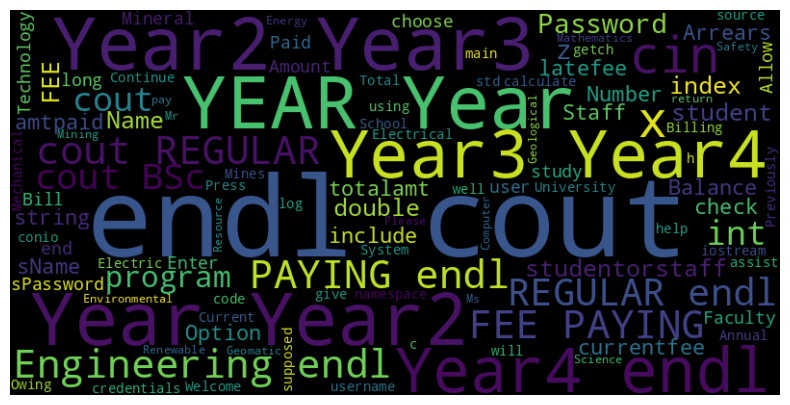

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400).generate(cleaned_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


# Step 7: Dataset Versioning

In [ ]:
!pip install dvc
!dvc init
!dvc add llm_dataset.json


ERROR: failed to initiate DVC - /content is not tracked by any supported SCM tool (e.g. Git). Use `--no-scm` if you don't want to use any SCM or `--subdir` if initializing inside a subdirectory of a parent SCM repository.
ERROR: you are not inside of a DVC repository (checked up to mount point '/')
